<font size="7">TP Machine Learning INSA LYON</font>

    Copyright (C) 2023  Kanaan Kevin, Foltête François, Vote Robin

    This program is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program.  If not, see <https://www.gnu.org/licenses/>.

<font size="5">Le but du TP est de prédire les prix en fonction de nos variables</font>

## Importation des libraries à utiliser

In [ ]:
import datetime as dt
import pandas as pd
import numpy as np
#Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#Libraries for data preprocessing
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# #Libraries for data modeling
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier

## Exploration ML TP

### Read csv file

In [ ]:
df = pd.read_csv('kc_house_data.csv')

### Affichages des 5 premières lignes de mon dataset

In [ ]:
df.head()

### Describe pour visualiser les données avec pandas

In [ ]:
df.info()
#Visualize the data that is in the csv
df.describe()

In [ ]:
df.isnull().sum()

On constate qu'aucune variable ne contient de valeur nulle.

##  Visualisation par variable - On utilise pyplot pour afficher des infos utiles sur nos données

Pour chaque variable on affiche un histogramme pour en apprendre plus sur les variables

### Price info

In [ ]:
plt.figure(figsize=(20,10))
plt.hist(df['price'], bins=100, color='green')
plt.xlabel('Price')
plt.ylabel('Number of houses')
plt.show()

In [ ]:
#price describe
df['price'].describe()

### sqft living info

Représente la superficie intérieure

In [ ]:
plt.figure(figsize=(20,10))
plt.hist(df['sqft_living'], bins=100, color='green')
plt.xlabel('sqft_living')
plt.ylabel('Number of houses')
plt.show()

In [ ]:
#print info about sqft_living
df['sqft_living'].describe()

Avoir une visualisation des tranches de 100 square foot

In [ ]:
# On arrondis au millier pour pouvoir compter la fréquence de chaque tranche (de 100)
sqft_living_arrondis = [sq // 100 * 100 for sq in df['sqft_living']]
# Vérification de l'arrondis
# print(sqft_living_100[:100])

In [ ]:
pd_sqft_living_arrondis = pd.DataFrame(sqft_living_arrondis, dtype=int)
pd_sqft_living_arrondis.value_counts()

In [ ]:
plt.figure(figsize=(20,10))
plt.hist(sqft_living_arrondis, bins=100, color='green')
plt.xlabel('sqft_living_arrondis')
plt.ylabel('Number of houses')
plt.show()

Vérification de la maison avec la valeur **max** pour *sqft_living*.

In [ ]:
df[df['sqft_living'] == 13540.000000]

Cette maison coûte 2 280 000 $ cela parait cohérent.

Vérification de la maison avec la valeur **min** pour *sqft_living*.

In [ ]:
df[df['sqft_living'] == 290]

En regardant sur google maps, on observe un cabanon autour d'un lac. De plus le terrain est grand. Le prix paraît cohérent.

### sqft lot info

In [ ]:
plt.figure(figsize=(20,10))
plt.hist(df['sqft_lot'], bins=100, color='green')
plt.xlabel('sqft_lot')
plt.ylabel('Number of houses')
plt.show()


### Bedrooms info

In [ ]:
plt.figure(figsize=(20,10))
plt.hist(df['bedrooms'], bins=100, color='green')
plt.xlabel('bedrooms')
plt.ylabel('Number of houses')
plt.show()

In [ ]:
df['bedrooms'].describe()

In [ ]:
df['bedrooms'].value_counts()

In [ ]:
# print info on the row with 33 bedrooms
df[df['bedrooms'] == 33]

In [ ]:
df[df['bedrooms'] == 11]

In [ ]:
df[df['bedrooms'] == 0]
#id 6994 valeur abérante

### Bathrooms info

In [ ]:
plt.figure(figsize=(20,10))
plt.hist(df['bathrooms'], bins=100, color='green')
plt.xlabel('bathrooms')
plt.ylabel('Number of houses')
plt.show()

In [ ]:
#print info about bathrooms
df['bathrooms'].describe()

In [ ]:
df['bathrooms'].value_counts()

In [ ]:
#Show the line where bathrooms is 8
df[df['bathrooms'] == 8]

In [ ]:
df[df['bathrooms'] == 0]
#id 875 abbérant

On remarque ici que le nombre de bathrooms est un décimal et pas un int parce que on considère plusieurs types de Bathrooms. On site la source : https://www.kaggle.com/datasets/harlfoxem/housesalesprediction/discussion/24804?resource=download </br>
On a des "full-bathrooms" des "semi" etc...

### Waterfront info

In [ ]:
plt.figure(figsize=(20,10))
plt.hist(df['waterfront'], bins=100, color='green')
plt.xlabel('waterfront')
plt.hist(df['grade'], bins=100, color='green')
plt.xlabel('grade')
plt.ylabel('Number of houses')
plt.show()

In [ ]:
df['waterfront'].value_counts()

In [ ]:
df['waterfront'].describe()

In [ ]:
#Show the price of the houses with a waterfront
df[df['waterfront'] == 1]['price'].describe()
#Price histogramme of the houses with a waterfront
plt.figure(figsize=(20,10))
plt.hist(df[df['waterfront'] == 1]['price'], bins=100, color='green')
plt.xlabel('Price')
plt.ylabel('Number of houses')
plt.show()

In [ ]:
#Show the price of the houses without a waterfront
df[df['waterfront'] == 0]['price'].describe()
#Price histogramme of the houses without a waterfront
plt.figure(figsize=(20,10))
plt.hist(df[df['waterfront'] == 0]['price'], bins=100, color='green')
plt.xlabel('Price')
plt.ylabel('Number of houses')
plt.show()

In [ ]:
#Select the house with waterfront
waterfronts=df[df['waterfront'] == 1]
#Get the row with the highest price in the waterfronts
waterfronts[waterfronts['price'] == waterfronts['price'].max()]

### Grade info

In [ ]:
plt.figure(figsize=(20,10))
plt.hist(df['grade'], bins=100, color='green')
plt.xlabel('grade')
plt.ylabel('Number of houses')
plt.show()

In [ ]:
df['grade'].describe()

Les notes varient de 1 à 13. Elles représentent la qualité de la construction de la maison. On peut voir que la majorité des maisons ont une note comprise entre 7 et 8.

### Year built info

In [ ]:
plt.figure(figsize=(20,10))
plt.hist(df['yr_built'], bins=100, color='green')
plt.xlabel('Year built')
plt.ylabel('Number of houses')
plt.show()

In [ ]:
df['yr_built'].describe()

Les maisons sont toutes construites entre 1900 et 2015. La moitié des maisons ont été construites après 1975.

### Year renovated info

In [ ]:
renovated_houses = df[df['yr_renovated'] != 0]
plt.figure(figsize=(20,10))
plt.hist(renovated_houses["yr_renovated"], bins=100)
plt.xlabel('Year renovated')
plt.ylabel('Number of houses')
plt.show()

In [ ]:
# Uniquement les maisons qui ont été rénovées
renovated_houses['yr_renovated'].describe()

In [ ]:
# Toutes les maisons
df['yr_renovated'].describe()

Cette variable nous permet de savoir quand est-ce qu'une maison a été rennovée. Les maisons qui n'ont pas été rennovées ont une valeur de 0. On peut voir que la majorité des maisons n'ont pas été rennovées. Pour celles qui ont été rennovées, elles l'ont été entre 1934 et 2015.

### View info

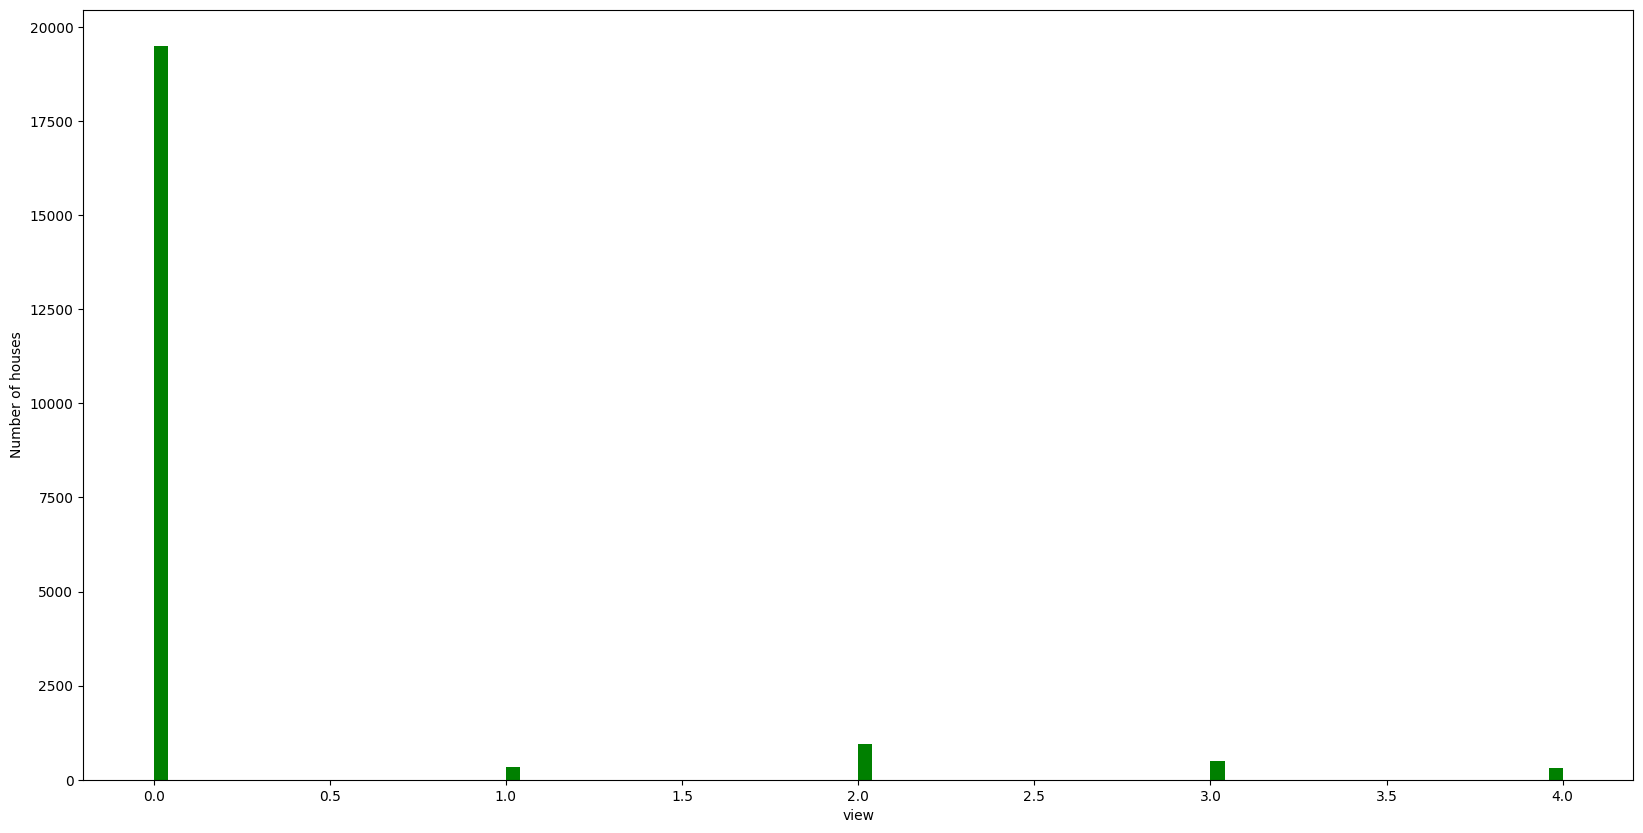

In [100]:
plt.figure(figsize=(20,10))
plt.hist(df['view'], bins=100, color='green')
plt.xlabel('view')
plt.ylabel('Number of houses')
plt.show()

In [ ]:
df['view'].describe()

In [ ]:
df['view'].value_counts()

Text(0.5, 0, 'Price')

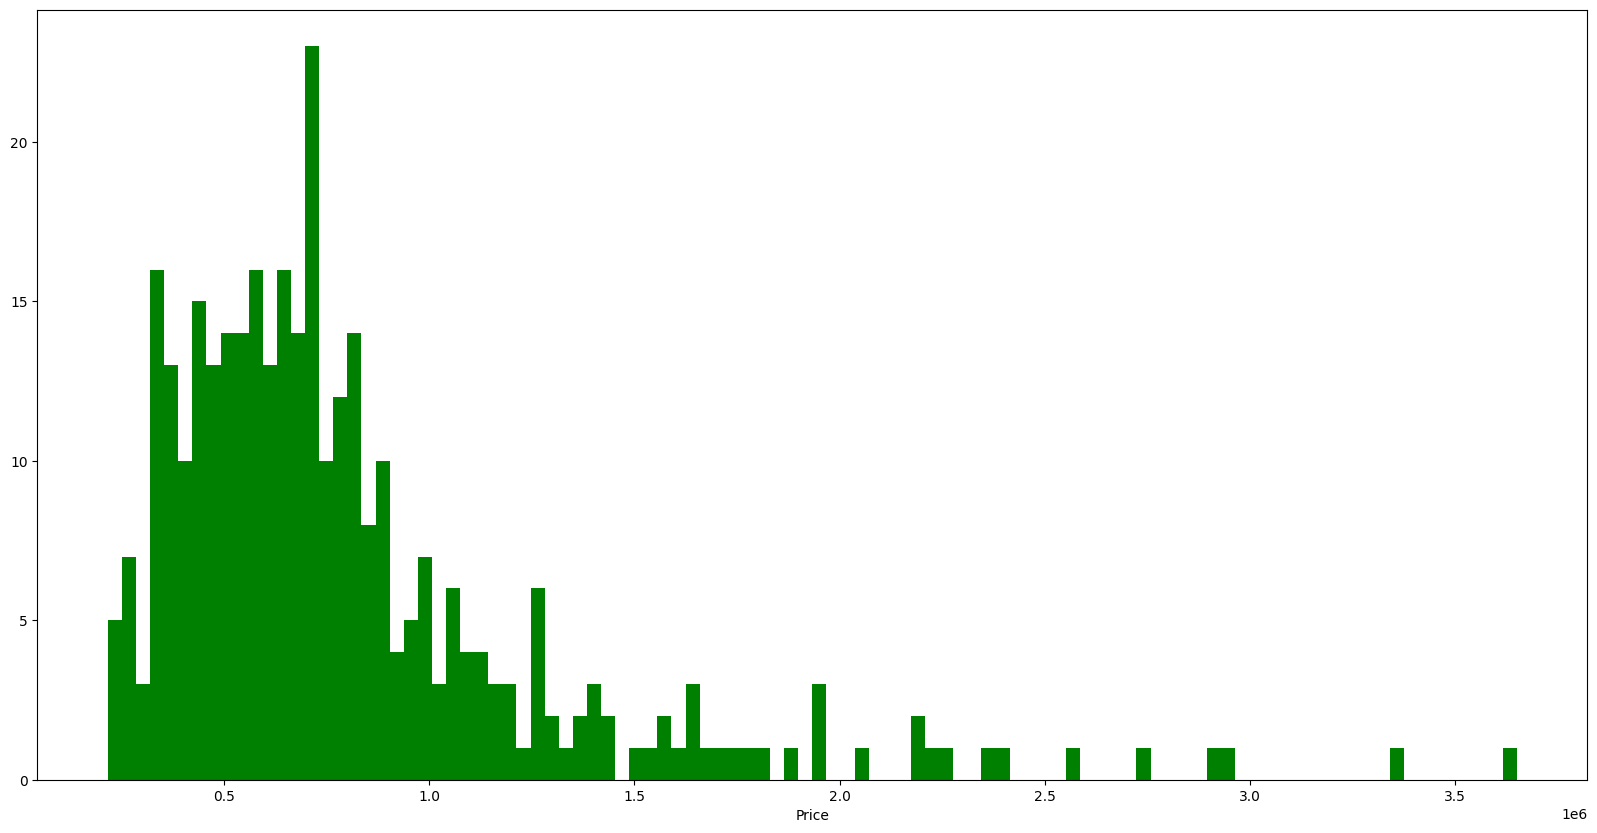

In [98]:
#Show the price of the houses with a view
df[df['view'] == 1]['price'].describe()
#Price histogramme of the houses with a view
plt.figure(figsize=(20,10))
plt.hist(df[df['view'] == 1]['price'], bins=100, color='green')
plt.xlabel('Price')

In [99]:
#Choose the row with the highest price and view value of 4
views=df[(df['view'] == 4)]
views[views['price'] == views['price'].max()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9254,9208900037,735495,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.24,4540,42730


### Taille de la maison et du terrain

In [ ]:
# sqft_living15 : average size of 15 closest houses
# Houses that are 25% bigger than their neighbours in average
# Those houses have a comparatible advantage on their nearest neighbours
df[df['sqft_living'] > 1.25*df['sqft_living15']]

In [ ]:
# Houses that are somehow bigger than the lot they are in..
df[df['sqft_living']/df['floors'] > df['sqft_lot']]

## Nettoyage des données

In [ ]:
# Formatage date
df['date'] = df['date'].astype('datetime64[ns]')
df['date'] = pd.to_datetime(df['date'])
df['date']=df['date'].map(dt.datetime.toordinal)

In [ ]:
# Maison qui sont plus grandes que le terrain sur lequel elles sont construites
df = df.drop(df[df['sqft_living']/df['floors'] > df['sqft_lot']].index)

In [ ]:
# Maison qui a 33 chambres pour une superficie d'environ 162m² et 1 seul étage
df = df.drop(df[df['bedrooms'] == 33].index)

## Modèles prédictifs

### Modèle simple de régression linéaire

In [ ]:
#etude de la correlation
matrice_corr = df.corr().round(1)
sns.heatmap(data=matrice_corr, annot=True)

Grâce à cette matrice de corrélation, on regarde la corrélation des différentes variables avec le prix. Il faut choisir les variables à retenir pour notre modèle en retenant celles qui sont le plus fort coefficient de corrélation. On constate que les coefficients vont de 0 à 0.7 (en valeurs absolues). On peut choisir de retenir les qui ont un coefficient supérieur ou égal à 0.4 en valeur absolue. On retient donc bathrooms, sqft_living, view, grade, sqfr_above et sqft_living15.

#### Mise en place du modèle

In [ ]:
#on utilise seulement les variables qui ont une correlation avec le prix
X=pd.DataFrame(np.c_[df['bathrooms'],df['sqft_living'],df['view'],df['grade'],df['sqft_above'],df['sqft_living15']], columns = ['bathrooms','sqft_living','view','grade','sqft_above','sqft_living15'])
Y = df['price']
 
#base d'apprentissage et base de test
 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

#### Entrainement du modèle

In [ ]:
#entrainement du modèle
 
lmodellineaire = LinearRegression()
lmodellineaire.fit(X_train, Y_train)

#### Evaluation du modèle

In [ ]:
# Evaluation du training set

y_train_predict = lmodellineaire.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
 
print("La performance du modèle sur la base d'apprentissage")
print('--------------------------------------')
print("L'erreur quadratique moyenne est {}".format(rmse))
print('\n')
 
# model evaluation for testing set
y_test_predict = lmodellineaire.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print("L'erreur quadratique moyenne est {}".format(rmse))

Le modèle n'est pas trop mauvais. L'erreur quadratique moyenne est d'environ 240000$, ce qui est de l'ordre de l'écart-type du prix des maisons (370000$).

### Modèle simple de régression linéaire avec toutes les variables

#### Mise en place du modèle

In [ ]:
# On exclue le l'id de la maison qui n'a aucune influence sur le prix
X = df.loc[:, ~df.columns.isin(['id','price'])]
Y = df['price']

#base d'apprentissage et base de test
 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

#### Entrainement du modèle

In [ ]:
#entrainement du modèle

lmodellineaire = LinearRegression()
lmodellineaire.fit(X_train, Y_train)

#### Evaluation du modèle

In [ ]:
# Evaluation du training set

y_train_predict = lmodellineaire.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
 
print("La performance du modèle sur la base d'apprentissage")
print('--------------------------------------')
print("L'erreur quadratique moyenne est {}".format(rmse))
print('\n')
 
# model evaluation for testing set
y_test_predict = lmodellineaire.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print("L'erreur quadratique moyenne est {}".format(rmse))

L'erreur quadratique moyenne est ici plus faible (200 000$). Le modèle est meilleur. Il peut cependant être intéressant de pousser l'analyse en utilisant un modèle avec régularisation.

### Ridge Regression

Pistes à étudier :
- log éventuel sur les variables si elles ne sont pas normales
- faire avec toutes les variables
- Modèle avec régularisation : ridge regression (cf cross validation pour trouver l'hyperparameter)
- Lasso
- modèle non linéaire